# Notebook Purpose
This notebook contains a handful of basic visualization about our datasette requests data. 

In [1]:
import pandas as pd

from usage_metrics.resources.sqlite import SQLiteManager

%config InlineBackend.figure_format = 'retina'

In [3]:
engine = SQLiteManager.setup_db()
print(engine)

with engine.connect() as con:
    logs = pd.read_sql_table("datasette_request_logs", con)

logs.info()

Engine(sqlite:////Users/apple/catalyst/business/usage_metrics/data/usage_metrics.db)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32286 entries, 0 to 32285
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   insert_id               32286 non-null  object        
 1   request_method          32286 non-null  object        
 2   request_url             32286 non-null  object        
 3   request_size            32286 non-null  int64         
 4   status                  32286 non-null  int64         
 5   response_size           32274 non-null  float64       
 6   user_agent              32281 non-null  object        
 7   remote_ip               32286 non-null  object        
 8   server_ip               32286 non-null  object        
 9   referer                 366 non-null    object        
 10  latency                 32286 non-null  float64       
 11  protocol             

## Request Volume
Number of requests for ferc1 and pudl tables and downloads per week.

<AxesSubplot:xlabel='Week', ylabel='Number of Data Requests'>

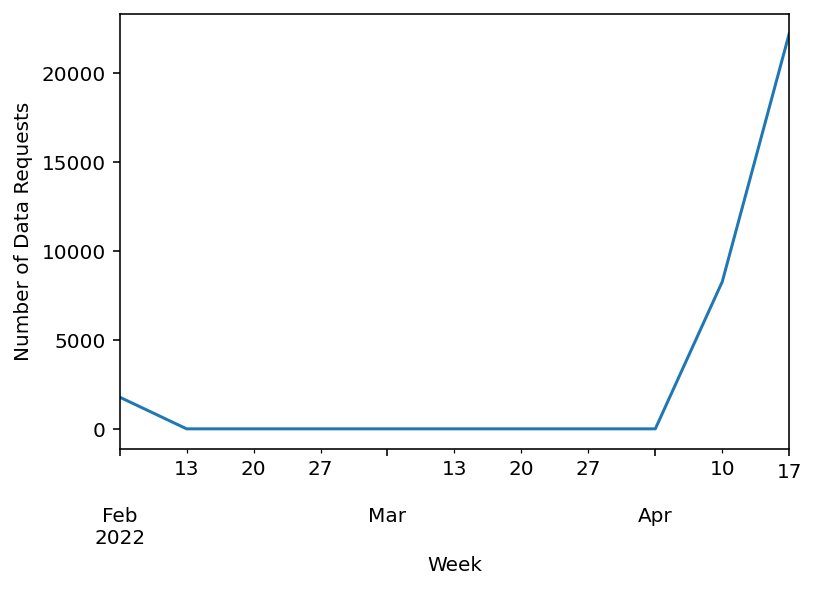

In [4]:
logs.set_index("timestamp").resample("1W").count().request_url_path.plot(xlabel="Week", ylabel="Number of Data Requests")

## Top Data Requests
The top datasette path requests. This includes json, csv and db downloads.

### Number of top data requests

<AxesSubplot:title={'center':'Requests by Data Path'}, ylabel='Number of Requests'>

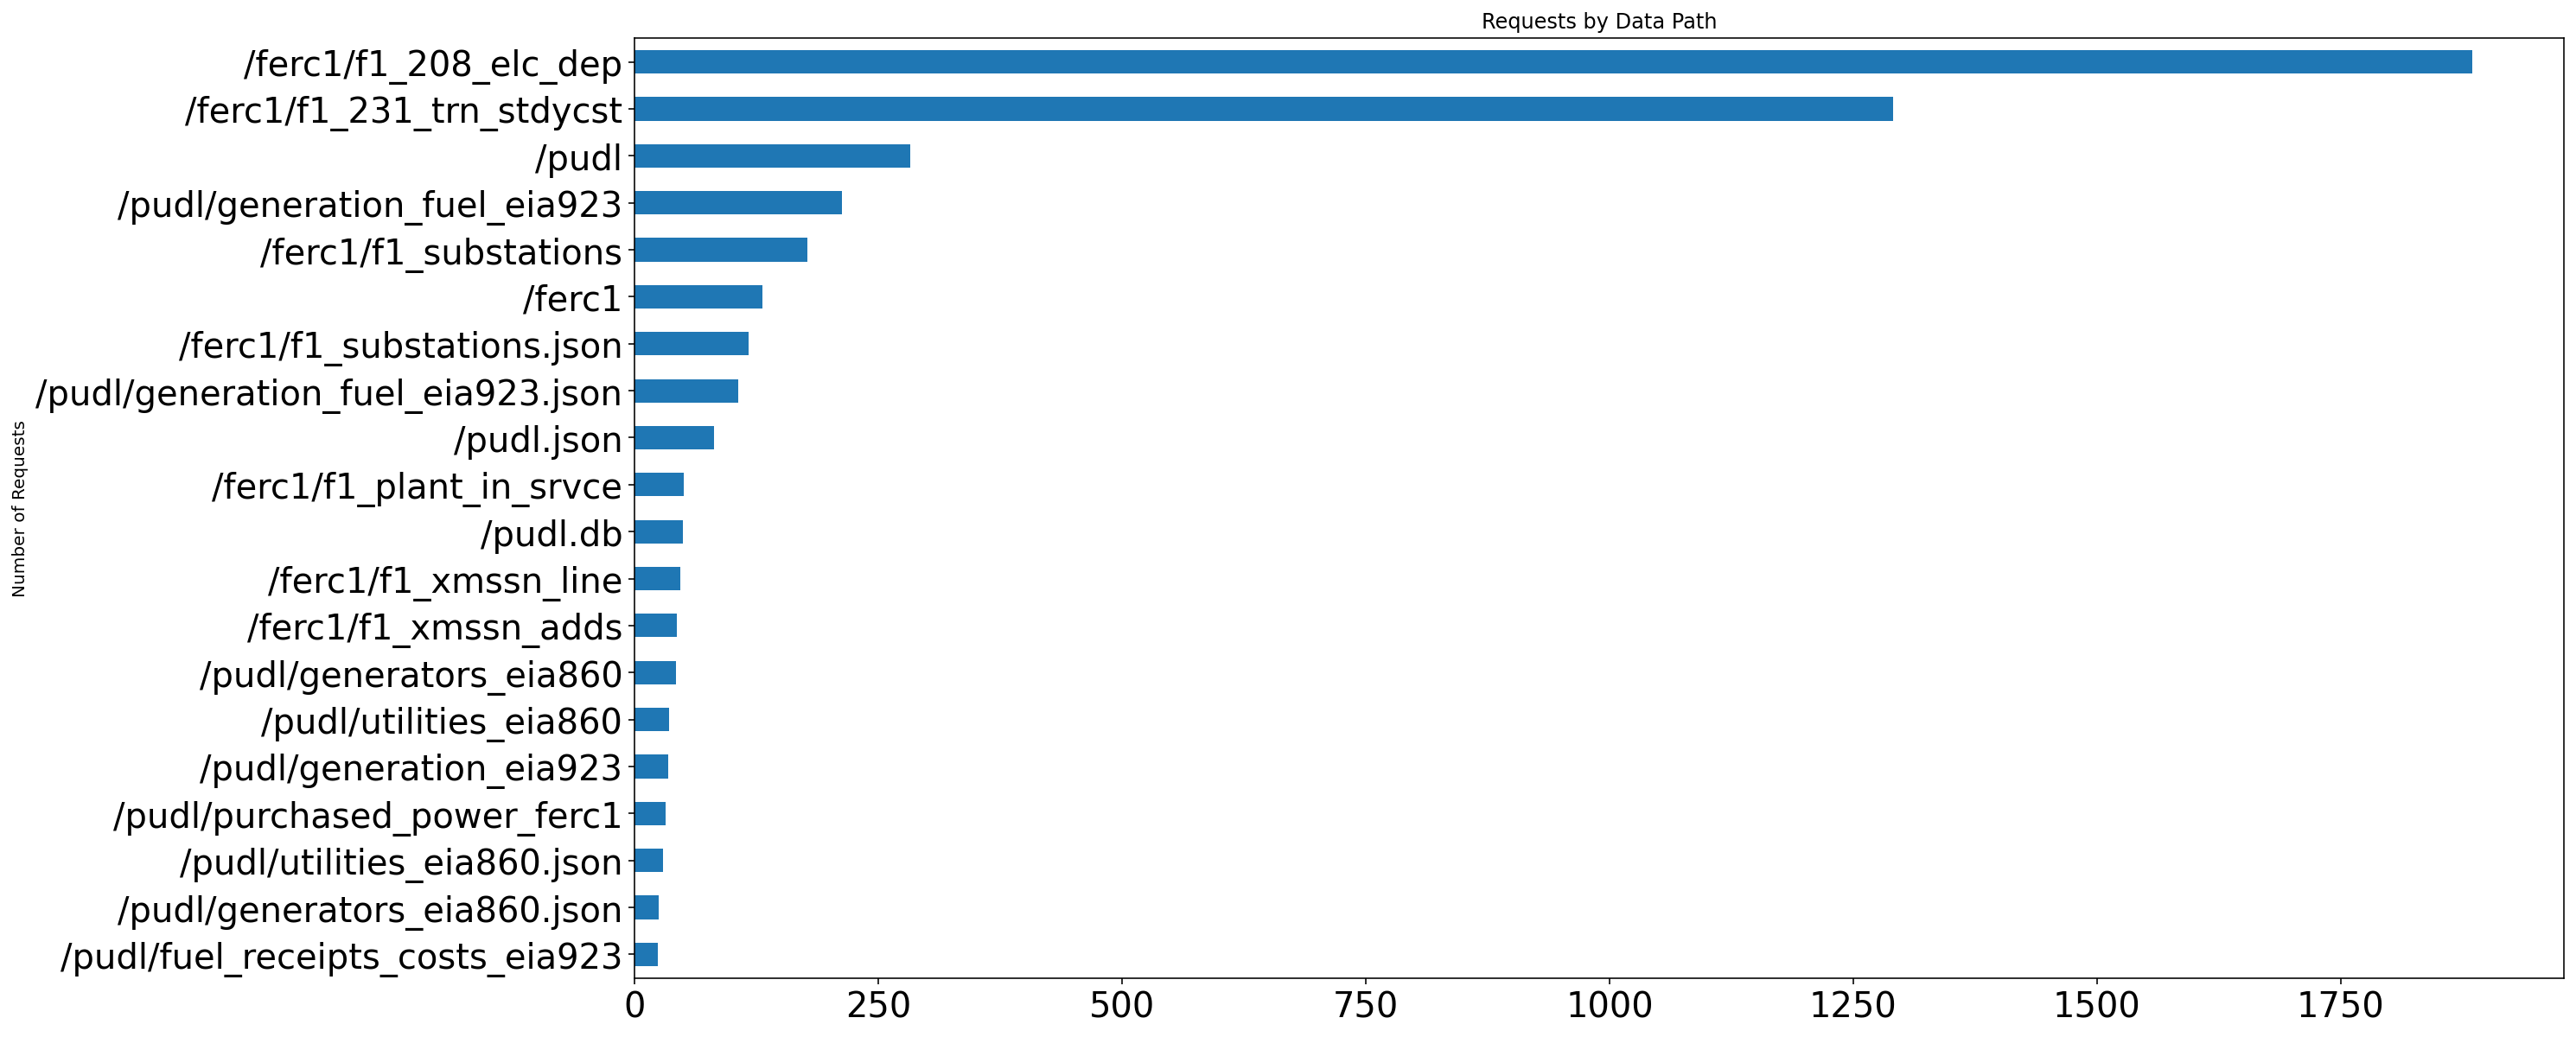

In [5]:
top_n = 20

logs.request_url_path.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by Data Path")

### Percent of all requests

This chart shows 14.538809391067339 % of all data requests.


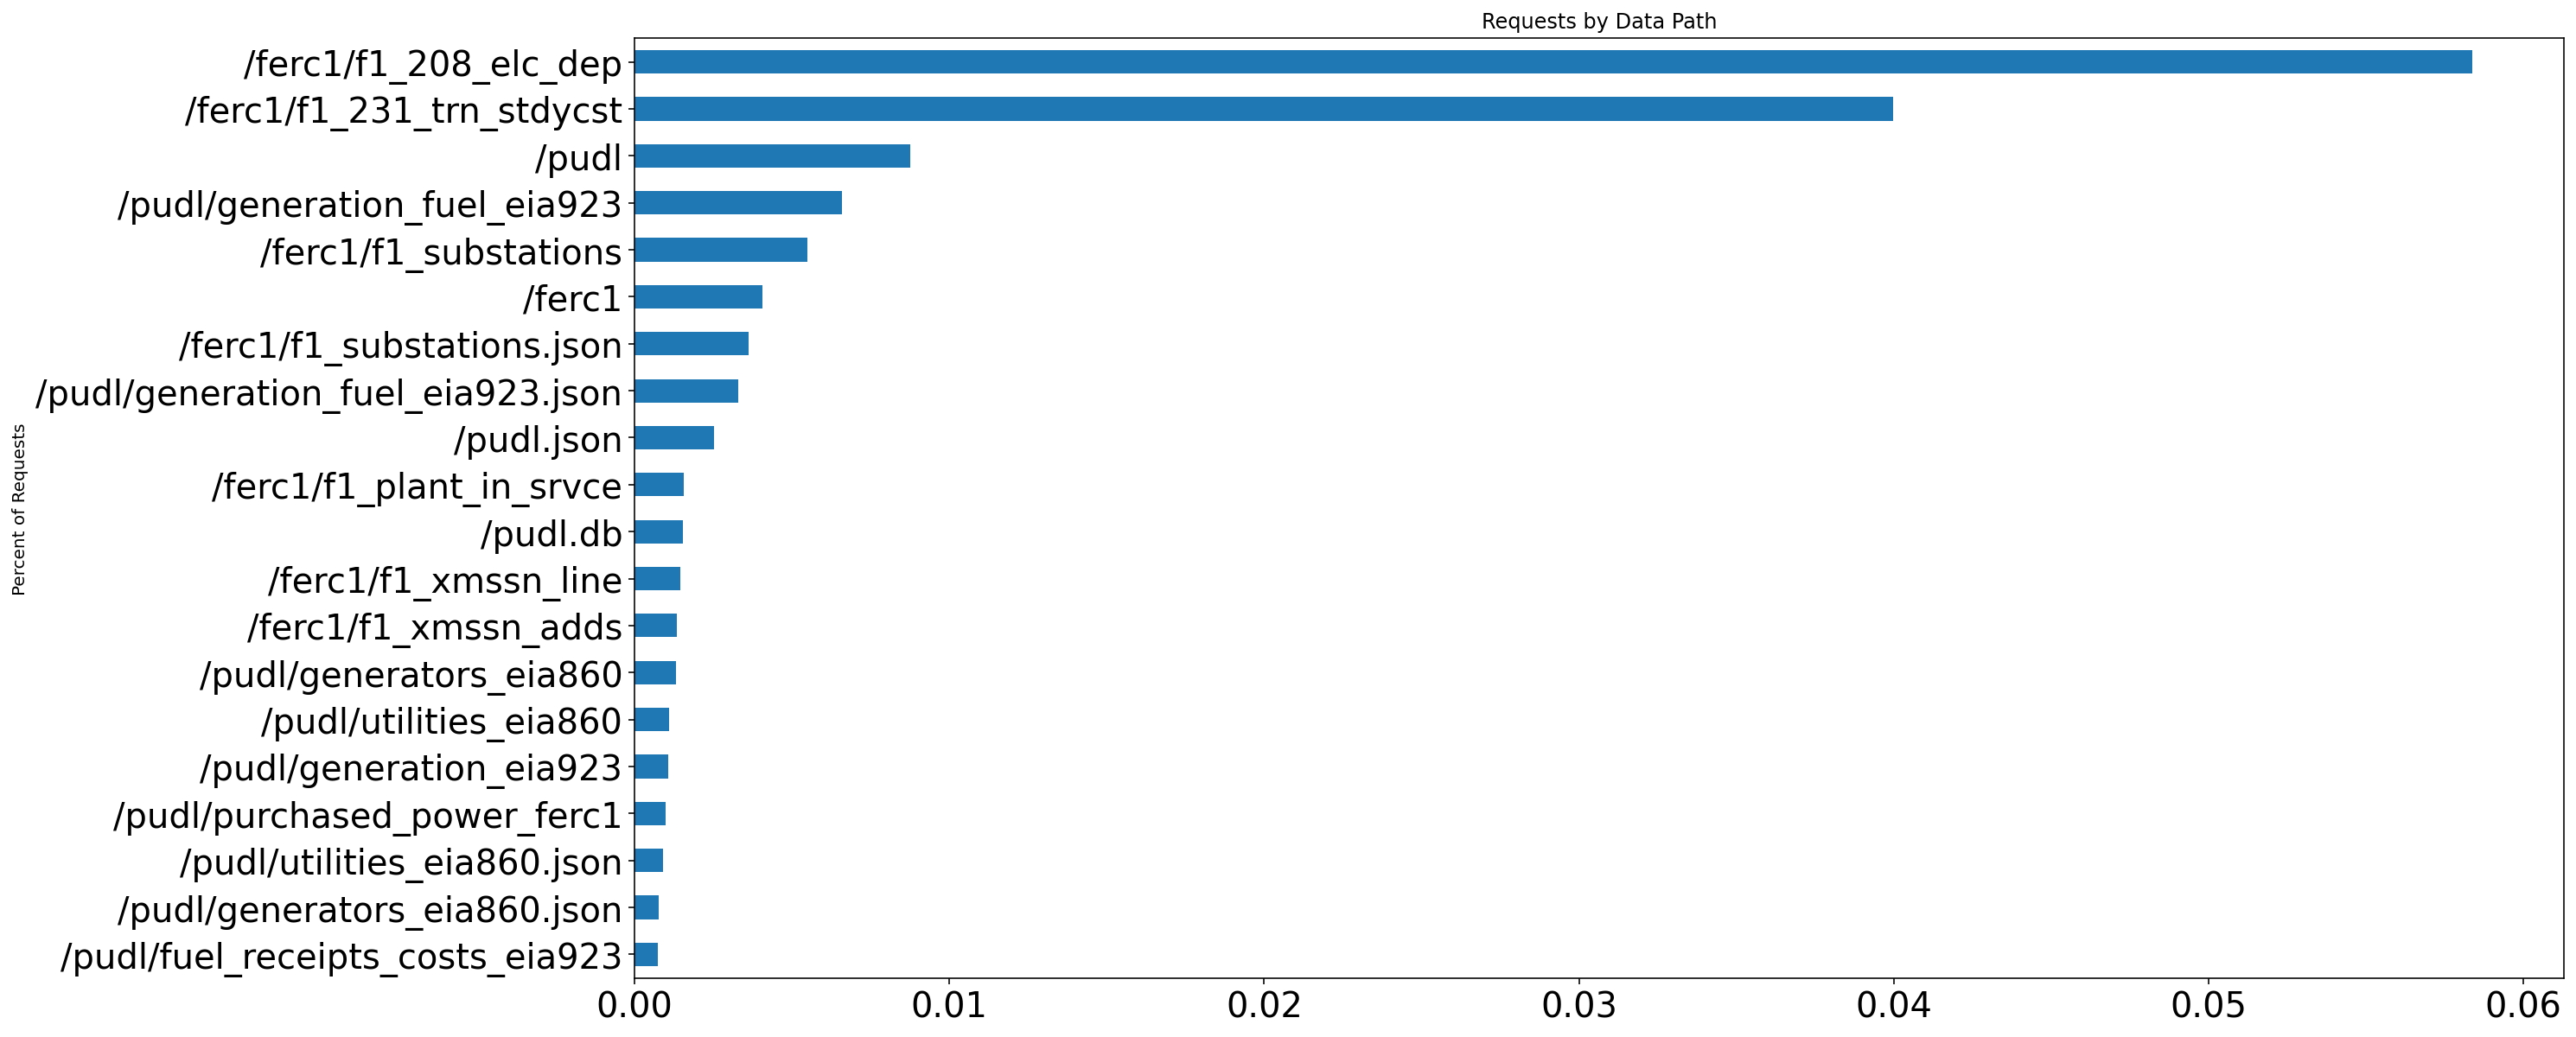

In [6]:
top_n = 20

top_paths = logs.request_url_path.value_counts(normalize=True).head(top_n)

top_paths.sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Percent of Requests", title="Requests by Data Path")

print(f"This chart shows {top_paths.sum() * 100} % of all data requests.")

## Top Organizations
Most organizations are generic internet providers however universities often have their own network set up. Unfortunately ipinfo charges for organization type so we have do some simple string filtering for now.  

In [6]:
university_substrings = ["Universitaet", "University", "College", "Institute"]

is_uni = logs.remote_ip_org.str.contains("|".join(university_substrings))

logs[is_uni].remote_ip_org.value_counts().sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by Academic Organization")

ValueError: Cannot mask with non-boolean array containing NA / NaN values

## Top Cities

In [ ]:
top_n = 20

full_location = logs.remote_ip_city + ", " + logs.remote_ip_region + ", " + logs.remote_ip_country

full_location.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Requests", title="Requests by City")

## Top referers

In [ ]:
logs.referer.isna().value_counts()

Most referers are null.

In [ ]:
top_n = 5

logs.referer.value_counts().head(top_n).sort_values().plot.barh(figsize=(20,10), fontsize=20, ylabel="Number of Referals", title="Top Referers")